<a href="https://colab.research.google.com/github/ola-sumbo/Data-Science-Hacks/blob/master/Feature_Engr_with_House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas_profiling
import requests 
%matplotlib inline

In [ ]:
url_train = "https://raw.githubusercontent.com/nastyh/Feature-Engineering--House-Prices/master/train.csv"
url_test = 'https://raw.githubusercontent.com/nastyh/Feature-Engineering--House-Prices/master/test.csv'

In [ ]:
train = pd.read_csv(url_train)
test = pd.read_csv(url_test)

In [ ]:
#train.describe().T
#test.describe().T

In [ ]:
#pandas_profiling.ProfileReport(test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


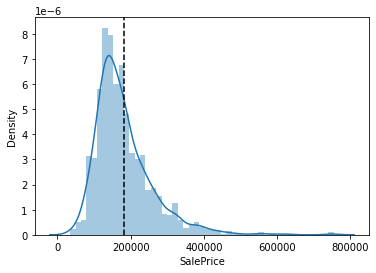

In [ ]:
# Distribution of SalePrice and mean 
sns.distplot(train['SalePrice'])
plt.axvline(train['SalePrice'].mean(), color="k", linestyle="--")

In [ ]:
#train.dtypes
#train.columns

**Dealing with Missing Values**

In [ ]:
# columns to drop at all from both sets
dr = ['Alley','Fence','FireplaceQu','MiscFeature','PoolQC']
train.drop(labels = dr, axis = 1, inplace = True)
test.drop(labels = dr, axis = 1, inplace = True)

In [ ]:
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
# train['Alley'].fillna('NA', inplace = True)
# train['FireplaceQu'].fillna('NA', inplace = True)
train['GarageQual'].fillna('NA', inplace = True)
train['GarageFinish'].fillna('NA', inplace = True)
train['GarageCond'].fillna('NA', inplace = True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
train['GarageType'].fillna('NA', inplace = True)
# train['PoolQC'].fillna('NA', inplace = True)
# train['Fence'].fillna('NA', inplace = True)
# train['MiscFeature'].fillna('NA', inplace = True)
train['MasVnrType'].fillna('None', inplace = True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace = True)
train['BsmtQual'].fillna('NA', inplace = True)
train['BsmtCond'].fillna('NA', inplace = True)
train['BsmtExposure'].fillna('NA', inplace = True)
train['BsmtFinType1'].fillna('NA', inplace = True)
train['BsmtFinType2'].fillna('NA', inplace = True)
train['Electrical'].fillna('SBrkr', inplace = True) # substituting with the majority class

# and for the test set

test['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
# test['Alley'].fillna('NA', inplace = True)
# test['FireplaceQu'].fillna('NA', inplace = True)
test['GarageQual'].fillna('NA', inplace = True)
test['GarageFinish'].fillna('NA', inplace = True)
test['GarageCond'].fillna('NA', inplace = True)
test['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
test['GarageType'].fillna('NA', inplace = True)
# test['PoolQC'].fillna('NA', inplace = True)
# test['Fence'].fillna('NA', inplace = True)
# test['MiscFeature'].fillna('NA', inplace = True)
test['MasVnrType'].fillna('None', inplace = True)
test['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace = True)
test['BsmtQual'].fillna('NA', inplace = True)
test['BsmtCond'].fillna('NA', inplace = True)
test['BsmtExposure'].fillna('NA', inplace = True)
test['BsmtFinType1'].fillna('NA', inplace = True)
test['BsmtFinType2'].fillna('NA', inplace = True)
test['Electrical'].fillna('SBrkr', inplace = True) # substituting with the majority class

In [ ]:
# Let's look a column name, and a number of NaNs
#train.isna().sum()
#or 
# train.columns[train.isna().any()].tolist()
#test.columns[test.isna().any()].tolist()

In [ ]:
# dealing with those test columns from above
test['Utilities'].value_counts(normalize = True)

AllPub    1.0
Name: Utilities, dtype: float64

In [ ]:
test['MSZoning'].fillna('RL', inplace = True)
test['Utilities'].dropna(inplace = True)
test['Exterior1st'].dropna(inplace = True)
test['Exterior2nd'].dropna(inplace = True)
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean(), inplace = True)
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean(), inplace = True)
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean(), inplace = True)
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean(), inplace = True)
test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean(), inplace = True)
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean(), inplace = True)
test['KitchenQual'].dropna(inplace = True)
test['Functional'].dropna(inplace = True)
test['GarageCars'].fillna(round(float(test['GarageCars'].mean()),1), inplace = True)
test['GarageArea'].fillna(test['GarageArea'].mean(), inplace = True)
test['SaleType'].dropna(inplace = True)

In [ ]:
test.drop(test.index[[95,45,485,756,1013,1029]], inplace = True)
test.drop(test.index[[455,691]], inplace = True)
test.drop(test.loc[test['Id']==1916].index, inplace = True)
test.drop(test.loc[test['Id']==2152].index, inplace = True)

In [ ]:
test[test.isna().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition


**Feature Engineering**

Make sure that categorical variables are treated as such. The same applies to numeric variables.

Check cardinality of categorical features.

See how “suspicious” columns interact with the target variable.

See if there are any highly correlated features that can be dropped.

See if there are any features that can be combined.

Conduct one-hot or frequency encoding of categorical variables taking into account cardinality.

In [ ]:
# Categorical variables are categorical and numeric are numeric
train['Id'] = train['Id'].astype('category') 
train['MSSubClass'] = train['MSSubClass'].astype('category')
# train['YearBuilt'] = train['YearBuilt'].astype('category')
# train['YrSold'] = train['YrSold'].astype('category')
# train['YearRemodAdd'] = train['YearRemodAdd'].astype('category')
train['MoSold'] = train['MoSold'].astype('category')
train['GarageYrBlt'] = train['GarageYrBlt'].astype('category')
# train['Fence'] = train['Fence'].astype('category')
# train['MiscFeature'] = train['MiscFeature'].astype('category')
train['MiscVal'] = train['MiscVal'].astype('category')

In [ ]:
#[col for col in train.columns.tolist() if train[col].dtype not in ['object']]

**Dealing with Cardinality**

When we try to convert the year built and yrsold it doesnt change, this indicates a cardinality problem. So when a categorical feature exhibits high cardinality. Most likely, you will use a one-hot encoder, but this is bad for computational purposes and may lead to over-fitting. You may approach this problem from a **conceptual** and **technically**. 

In [ ]:
# we check for cardinality and look for outliers
for col in train.columns:
    if train[col].dtype == "object":
        print("For column {} cardinality in Train minus cardinality in Test equals: {}".format(col, train[col].nunique()-test[col].nunique()))
# cardinality of train is always higher than that of test

For column MSZoning cardinality in Train minus cardinality in Test equals: 0
For column Street cardinality in Train minus cardinality in Test equals: 0
For column LotShape cardinality in Train minus cardinality in Test equals: 0
For column LandContour cardinality in Train minus cardinality in Test equals: 0
For column Utilities cardinality in Train minus cardinality in Test equals: 1
For column LotConfig cardinality in Train minus cardinality in Test equals: 0
For column LandSlope cardinality in Train minus cardinality in Test equals: 0
For column Neighborhood cardinality in Train minus cardinality in Test equals: 0
For column Condition1 cardinality in Train minus cardinality in Test equals: 0
For column Condition2 cardinality in Train minus cardinality in Test equals: 3
For column BldgType cardinality in Train minus cardinality in Test equals: 0
For column HouseStyle cardinality in Train minus cardinality in Test equals: 1
For column RoofStyle cardinality in Train minus cardinality in

**Exploring columns where cardinality in train and test sets isn't the same**

In [ ]:
# combining into one dataset in order to more conveniently compare unique values in these columns:
train_1 = train.copy()
train_1.drop(labels = 'SalePrice', axis = 1, inplace = True)
train_1['Status'] = 'Train Set' # adding a column Status to differentiate between Train and Test in the combined set
test_1 = test.copy()
test_1['Status'] = 'Test Set'
combo = train_1.copy()
combo = combo.append(test_1)

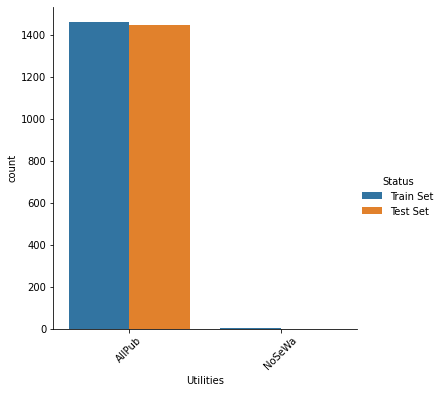

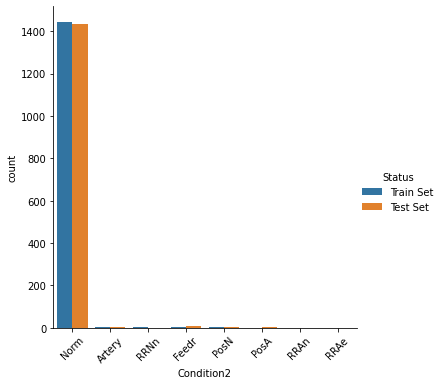

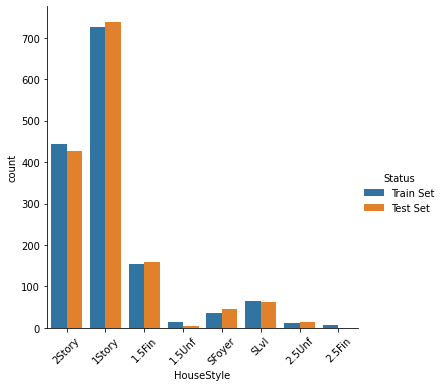

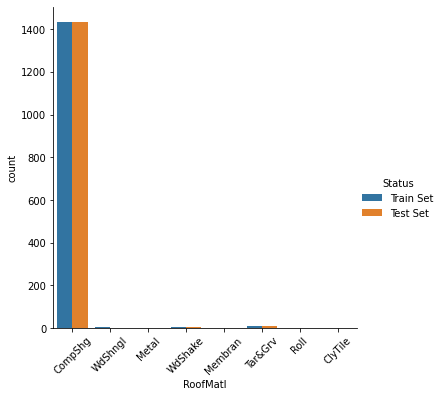

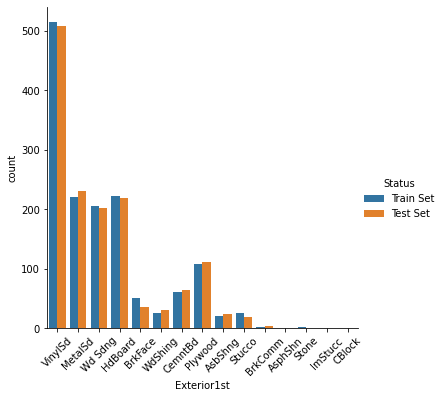

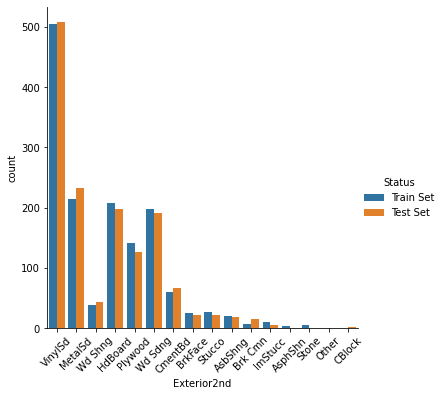

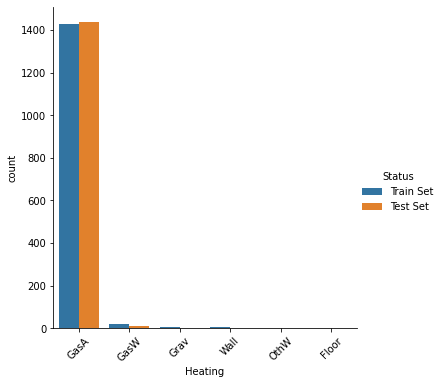

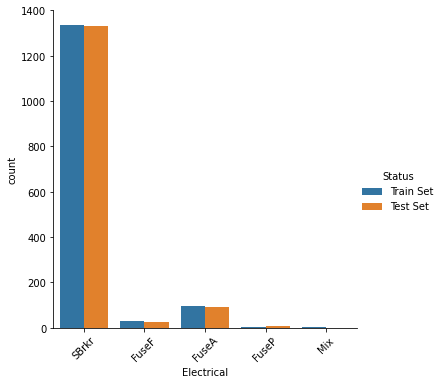

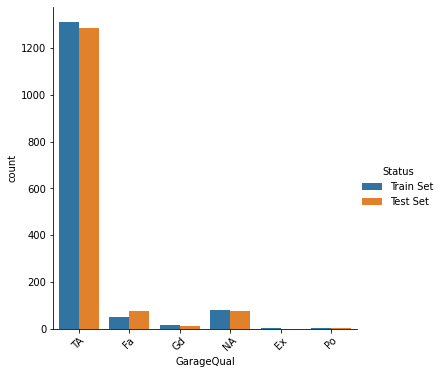

In [ ]:
# Gathering columns for which cardinality isn't the same into a list in order to make charts
cols_list = []
for col in train.columns:
     if train[col].dtype == "object" and (train[col].nunique()-test[col].nunique()) != 0:
        cols_list.append(col)
        

# looking at values in these columns
for l in cols_list:
    sns.catplot(x=l, hue='Status', kind='count', data=combo)
    plt.xticks(rotation=45)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fi

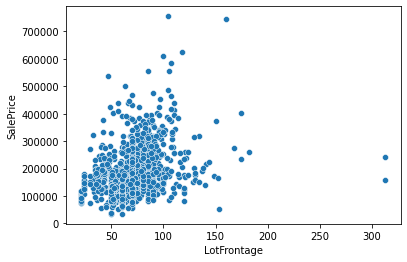

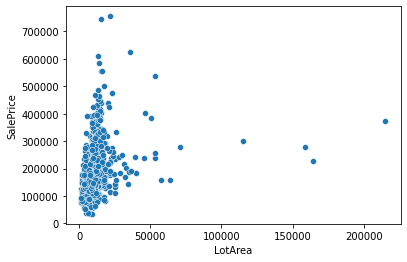

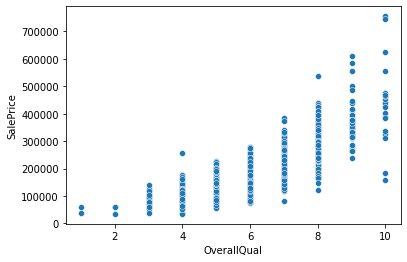

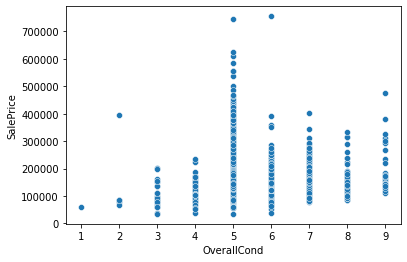

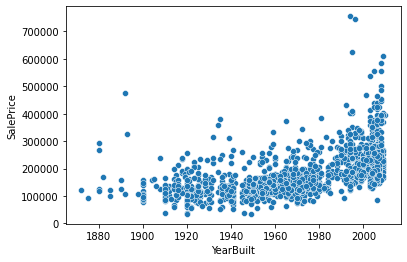

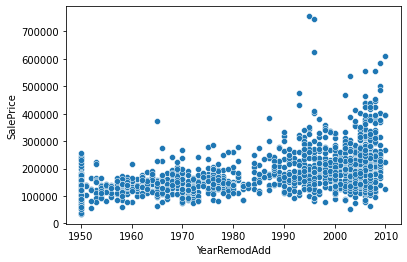

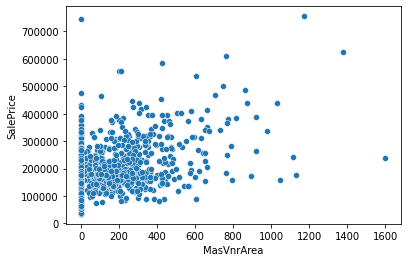

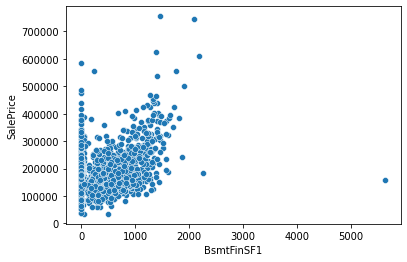

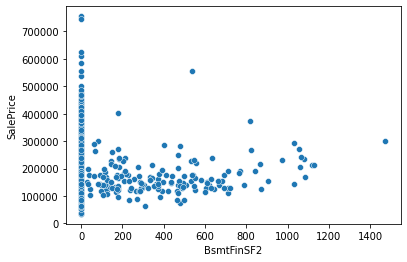

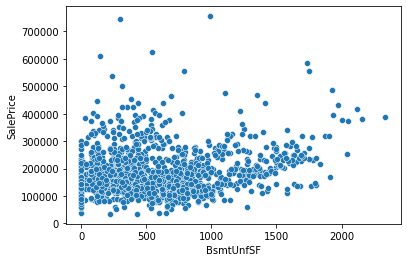

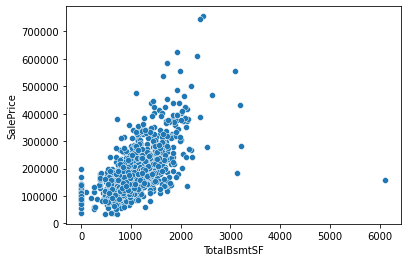

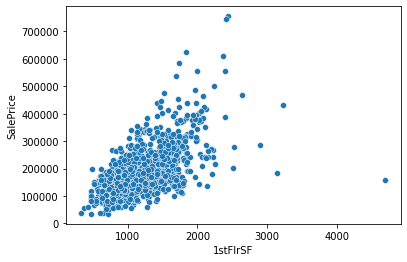

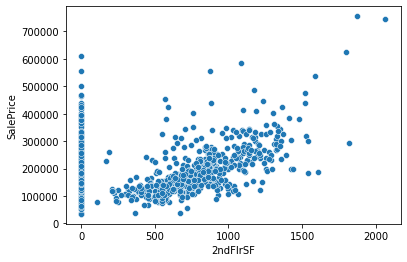

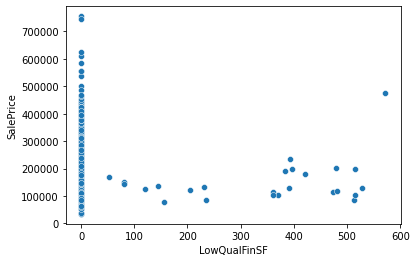

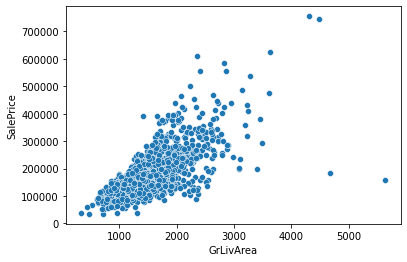

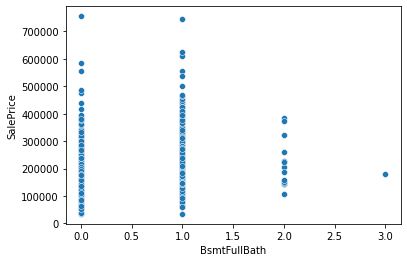

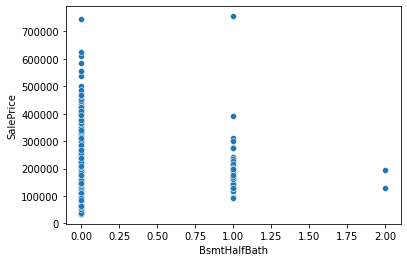

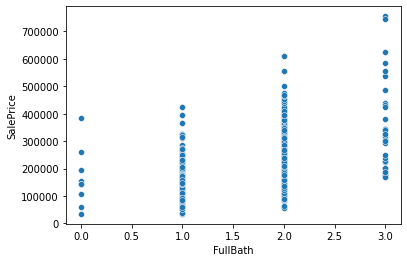

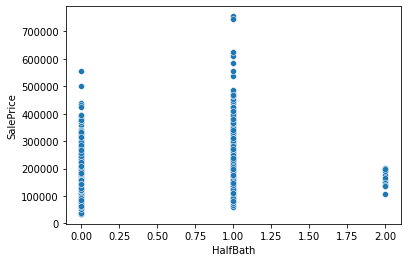

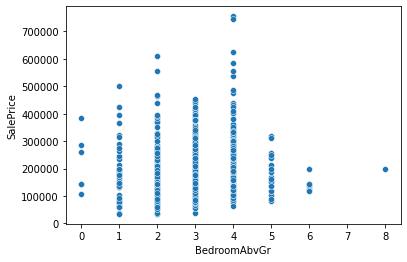

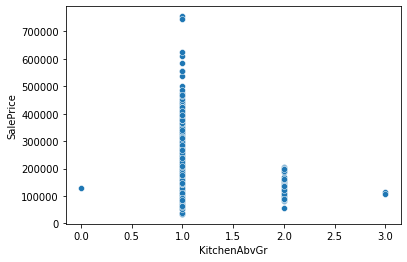

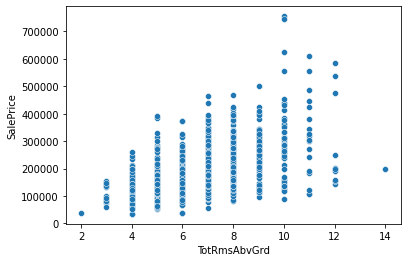

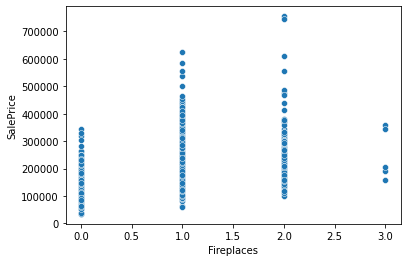

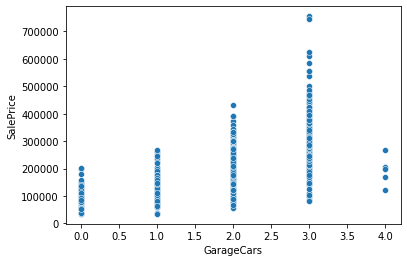

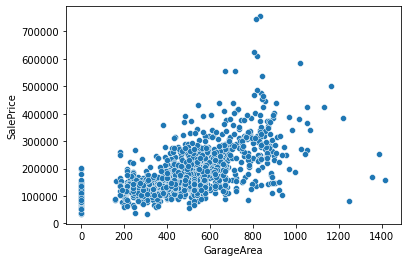

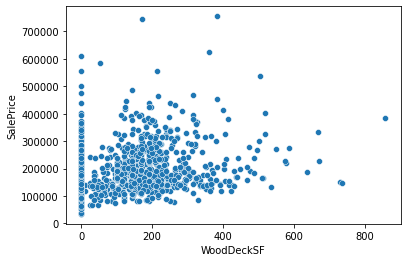

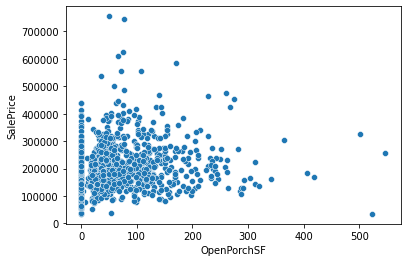

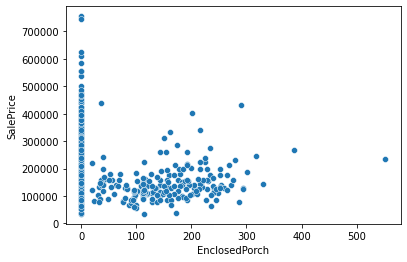

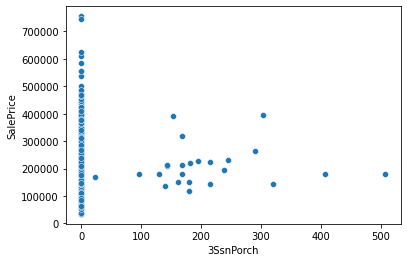

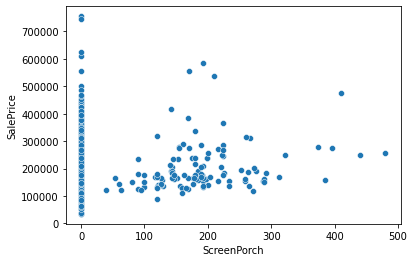

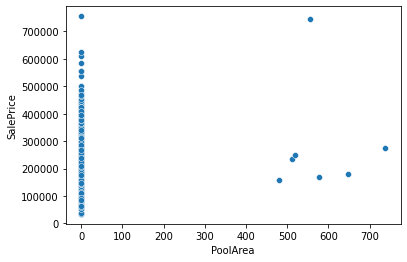

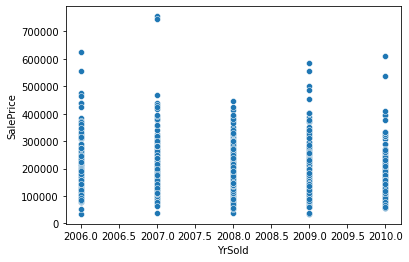

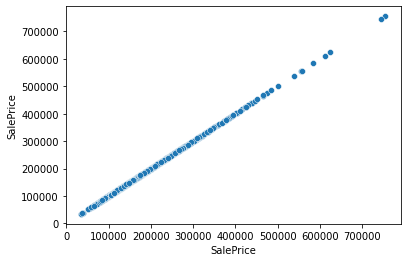

In [ ]:
# Scatterplots: numeric columns vs. SalePrice in the train set 
# numeric columns
digit_cols = train.select_dtypes(include=['float64','int64']).columns.to_list()
# scatter plots: digit_cols vs. SalePrice

for cols in digit_cols:
    plt.figure()
    sns.scatterplot(x = cols, y = 'SalePrice', data = train)
    
# LotFrontage, LotArea, YearBuilt, TotalBsmtSF, GrLivArea, 1stFlrSF, 2ndFlrSF, GarageArea seem to have linear relationships

In [ ]:
#unloading charts from the memory because there are too many
plt.clf()
plt.close()

In [ ]:
# turning object columns into category columns
for i in train.select_dtypes(include='object').columns.to_list():
    train[i] = train[i].astype('category')

In [ ]:
# list w/ categorical variables
cater_cols = train.select_dtypes(include='category').columns.to_list()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

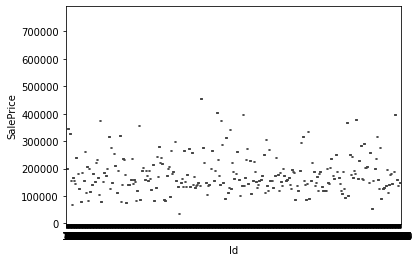

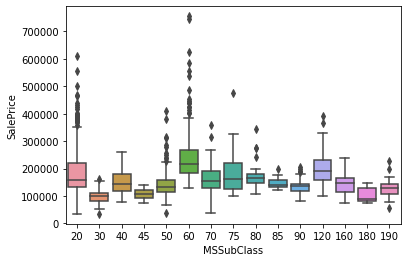

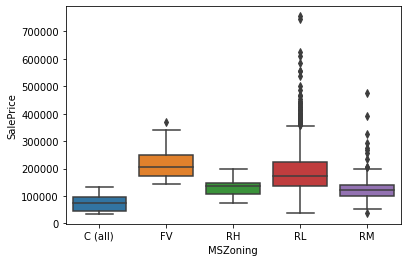

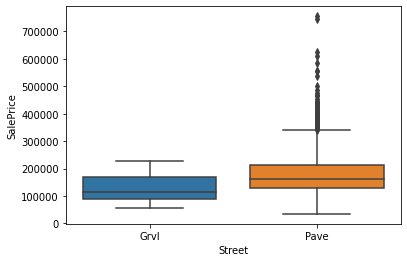

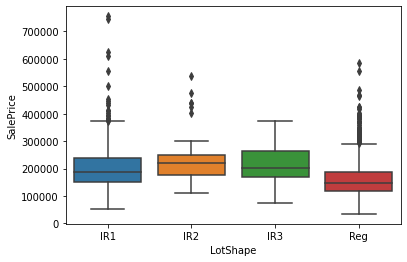

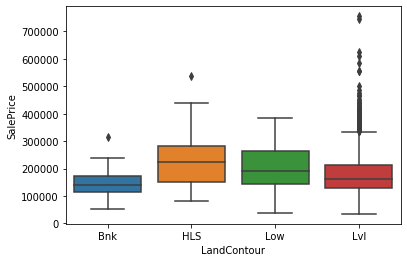

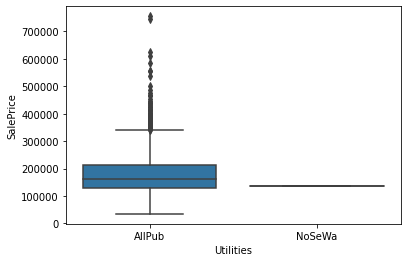

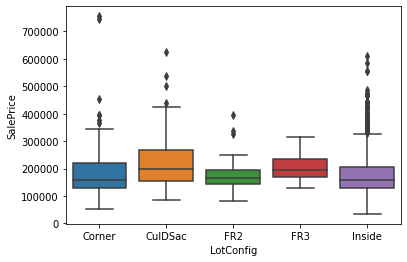

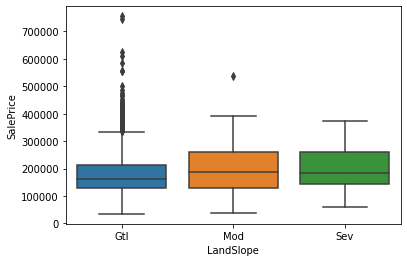

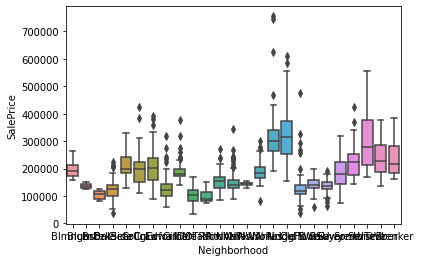

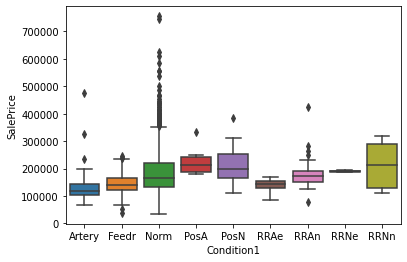

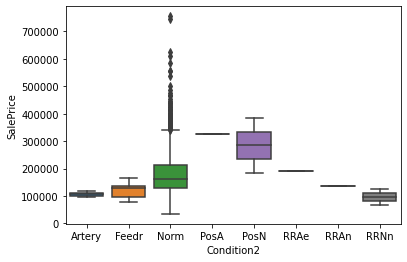

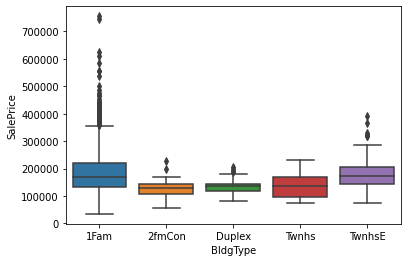

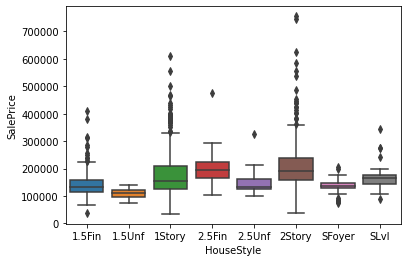

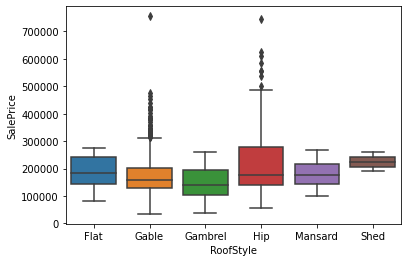

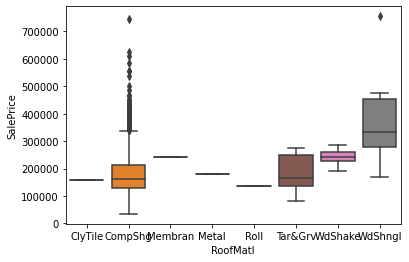

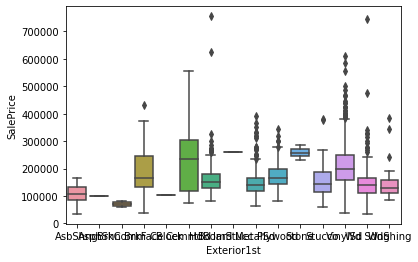

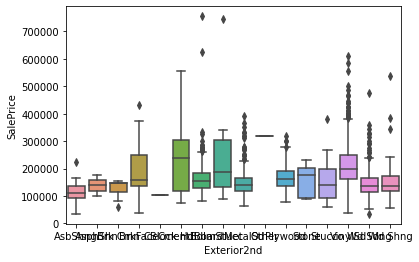

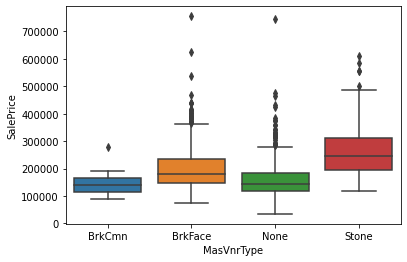

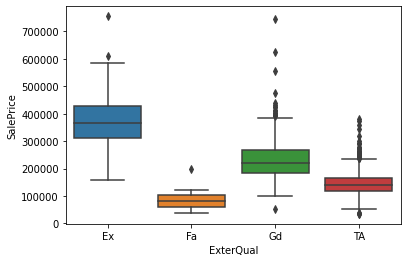

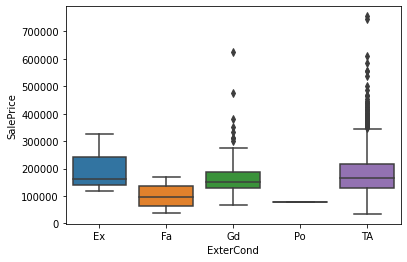

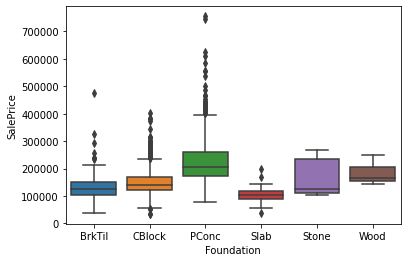

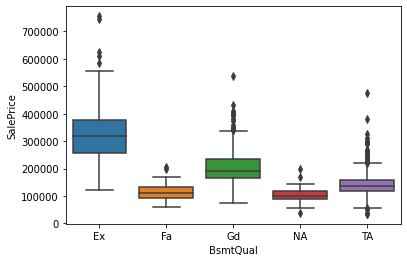

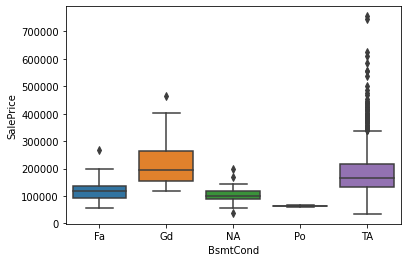

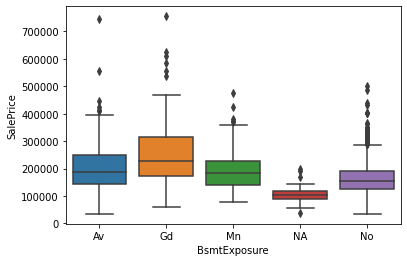

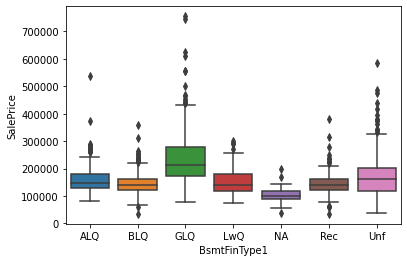

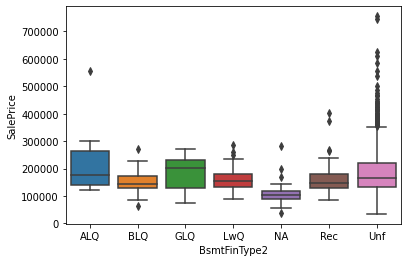

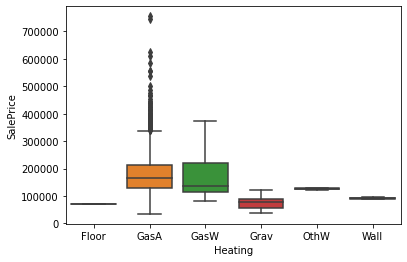

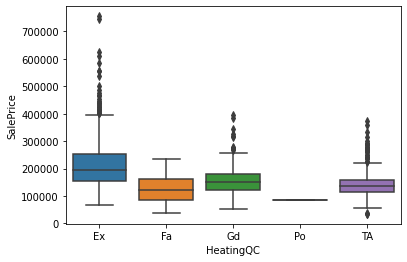

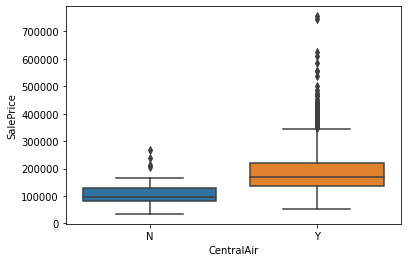

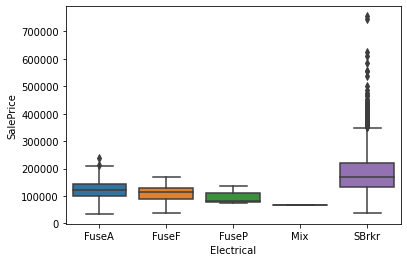

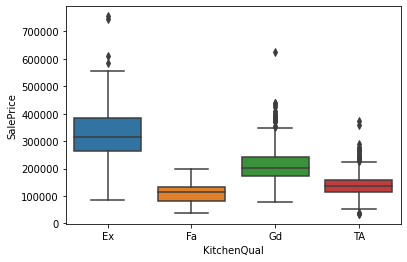

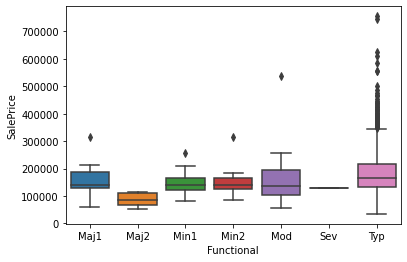

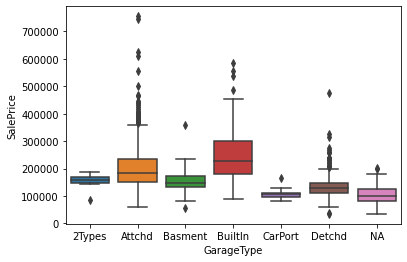

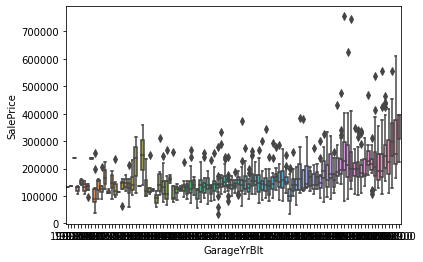

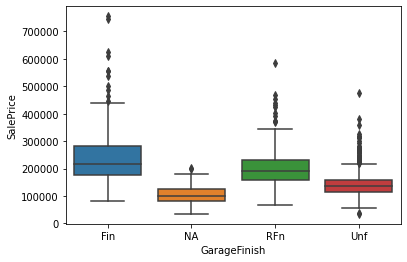

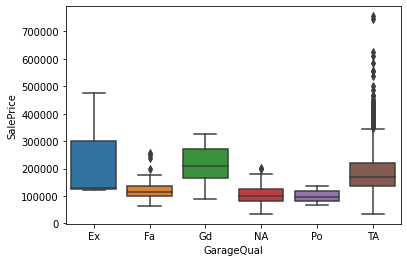

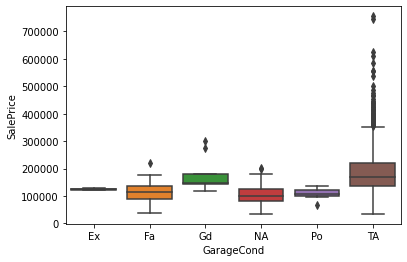

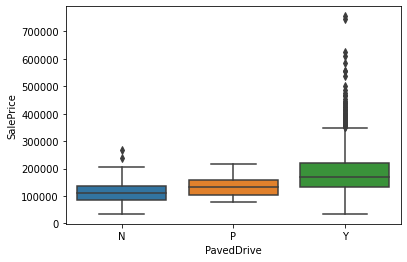

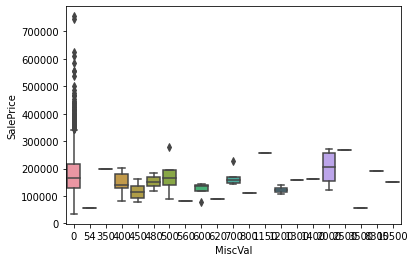

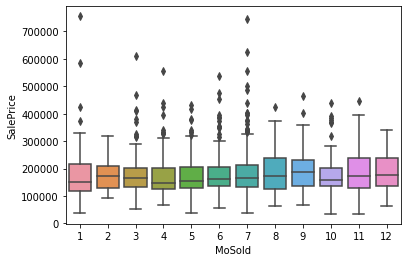

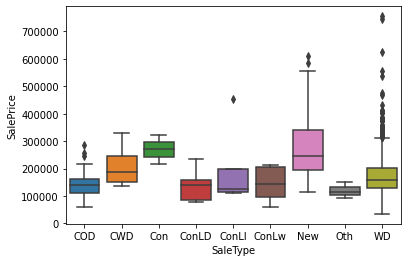

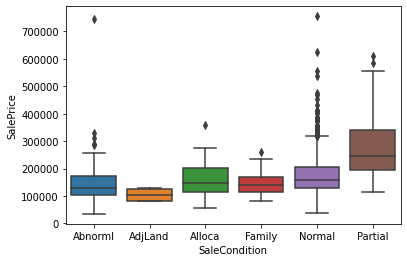

In [ ]:
# categorical variables vs. SalePrice TAKES TIME
for cols in cater_cols:
    plt.figure()
    sns.boxplot(x = cols, y = 'SalePrice', data = train)

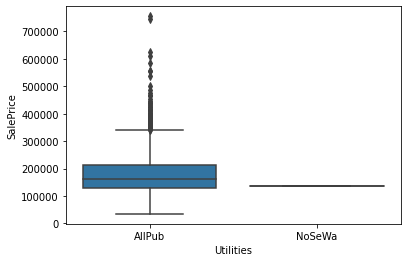

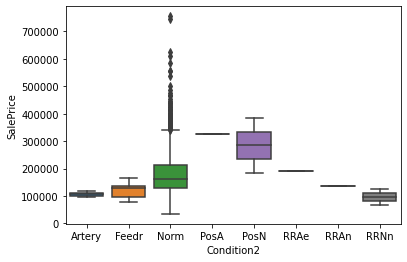

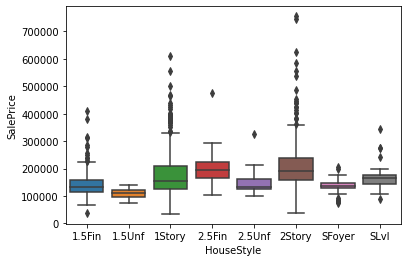

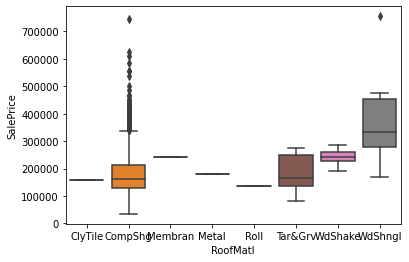

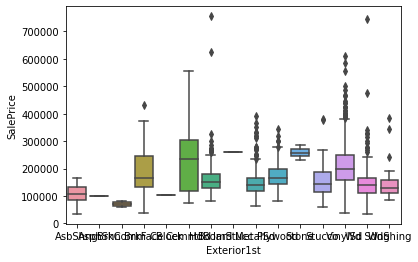

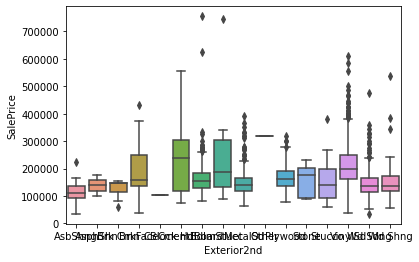

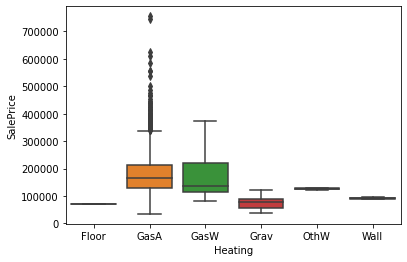

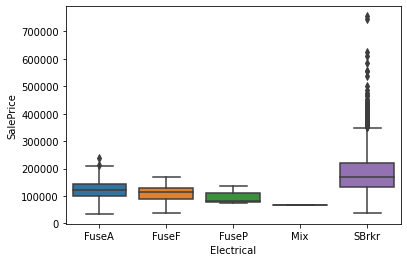

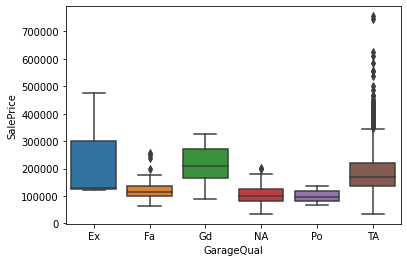

In [ ]:
# Going back to columns with different cardinality cols_list
for cols in cols_list:
    plt.figure()
    sns.boxplot(x = cols, y = 'SalePrice', data = train)

In [ ]:
#unloading charts from the memory because there are too many
plt.clf()
plt.close()

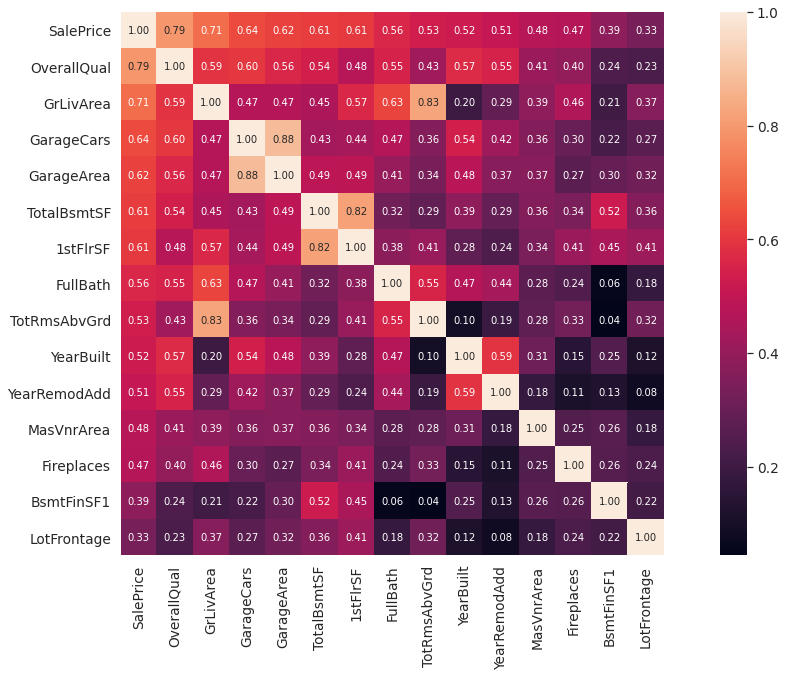

In [ ]:
corrmat = train.corr()
plt.figure(figsize=(20,10))
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# OverallQual, GrLivArea: Above grade (ground) living area square feet -- the strongest
#GarageCars and GarageArea is probably the same. Keeping only GarageCars because it's stronger
#TotalBsmtSF and 1stFlrSF are similar, keeping only TotalBsmntSF

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

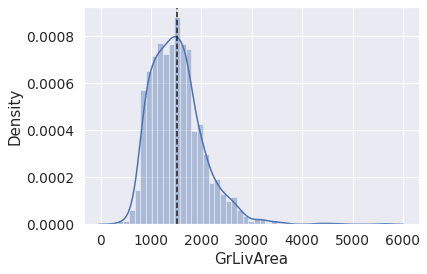

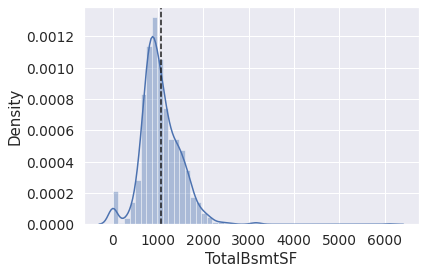

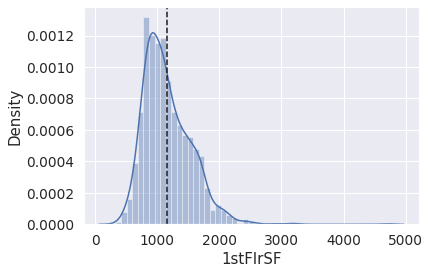

In [ ]:
# Looking at these variables again
sns.distplot(train['GrLivArea'])
plt.axvline(train['GrLivArea'].mean(), color="k", linestyle="--")
plt.figure()
sns.distplot(train['TotalBsmtSF'])
plt.axvline(train['TotalBsmtSF'].mean(), color="k", linestyle="--")
plt.figure()
sns.distplot(train['1stFlrSF'])
plt.axvline(train['1stFlrSF'].mean(), color="k", linestyle="--")
#all look normal

In [ ]:
plt.clf()
plt.close()

In [ ]:
#and for the train set
train['Remodeled Y/N'] = np.where(train['YearRemodAdd'] ==train['YearBuilt'], 'No', 'Yes')
train['Age when Sold'] = train['YrSold'] - train['YearRemodAdd']
train['Remodeled Y/N'] = train['Remodeled Y/N'].astype('category')

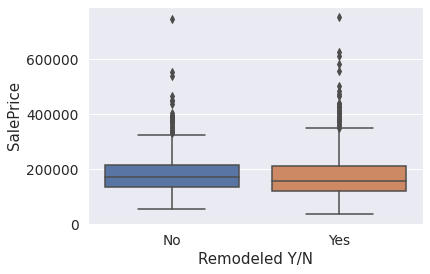

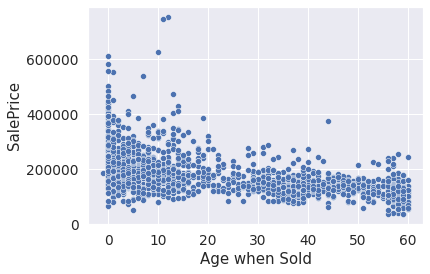

In [ ]:
sns.boxplot(x ='Remodeled Y/N' , y = 'SalePrice', data = train)
plt.figure()
sns.scatterplot(x = 'Age when Sold', y = 'SalePrice', data = train)
# nothing crazy

In [ ]:
#adding a new column totSqFt
#TotalBsmtSF + GrLivArea + 1stFlrSF
train['totSqFt'] = train['TotalBsmtSF'] + train['GrLivArea'] + train['1stFlrSF'] + train['2ndFlrSF']
# combo['totSqFt'] = combo['TotalBsmtSF'] + combo['GrLivArea']

In [ ]:
#adding a new column totBath
# FullBath + 0.5*HalfBath + BsmtFullBath + 0.5*BsmtHalfBath
train['totBath'] = train['FullBath'] + 0.5*train['HalfBath'] + train['BsmtFullBath'] + 0.5*train['BsmtHalfBath']

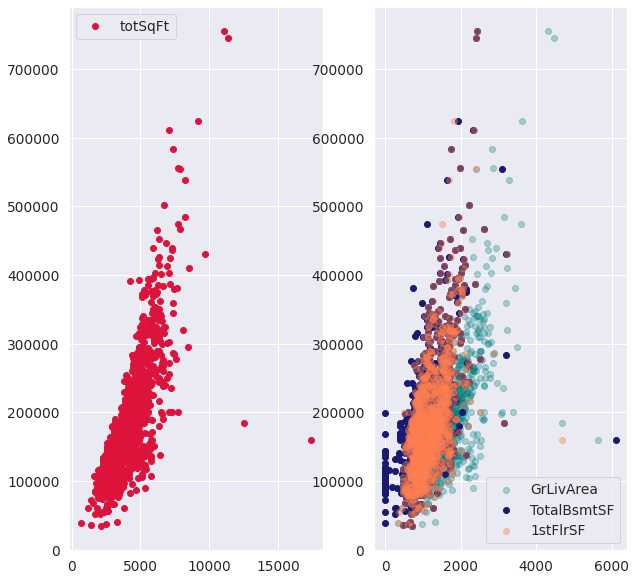

In [ ]:
# Looking at how the new feature compares to old three 
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(train['totSqFt'],train['SalePrice'], color = 'crimson', label = 'totSqFt')

ax2.scatter(train['GrLivArea'],train['SalePrice'], color = 'teal', alpha = 0.3, label ='GrLivArea')
ax2.scatter(train['TotalBsmtSF'],train['SalePrice'], color = 'midnightblue', label = 'TotalBsmtSF')
ax2.scatter(train['1stFlrSF'],train['SalePrice'], color = 'coral', alpha = 0.4, label = '1stFlrSF')

ax1.legend()
ax2.legend()
plt.show()

In [ ]:
# Remove variables that were used to create new features
cols_2_remove = ['GrLivArea','TotalBsmtSF','1stFlrSF','YearRemodAdd','YearBuilt','YrSold','Id','2ndFlrSF',
                'FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','GarageYrBlt']
train_rem = train.copy()
train_rem.drop(cols_2_remove, axis = 1, inplace = True)

**Correlation**

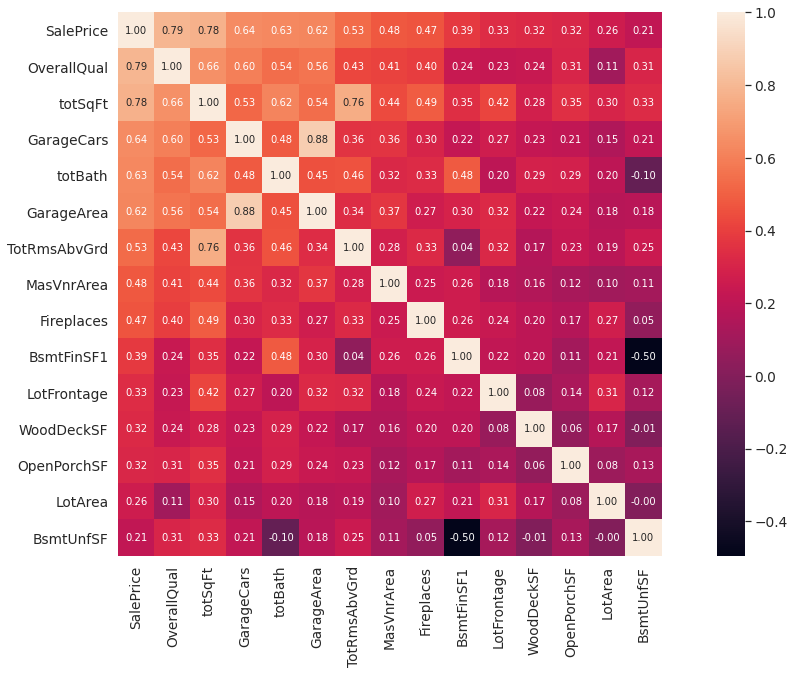

In [ ]:
# rebuilding the correlation map for the new dataset
corrmat_rem = train_rem.corr()
plt.figure(figsize=(20,10))
k = 15 #number of variables for heatmap
cols = corrmat_rem.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_rem[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# Remove features with the correlation coefficient below a certain threshold
# Not doing it actually but keeping for educatonal purposes
#corrmat_rem = train_rem.corr()
#k=15
#cols_min = corrmat_rem.nsmallest(k, 'SalePrice')['SalePrice']

In [ ]:
# ix = train_rem.corr().sort_values('SalePrice', ascending=True).index
# # train_rem.loc[:, ix]
# ix

# corr_matrix1 = train_rem.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
# sol = (corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))
#                  .stack()
#                  .sort_values(ascending=True))

In [ ]:
# number of features that are not category and that can be correlated with SalePrice 
len(train_rem.select_dtypes(exclude='category').columns.to_list())

#features to remove
# BsmtFinSF2, 3SsnPorch

25

In [ ]:
#features to remove based on their weak correlation with SalePrice
# BsmtFinSF2, 3SsnPorch
train_rem.drop(['BsmtFinSF2','3SsnPorch'], axis = 1, inplace= True)

In [ ]:
# Building normality plots
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Compare sqft and price of houses**

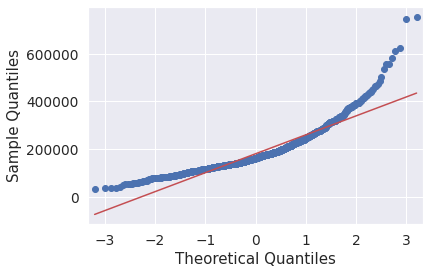

In [ ]:
qqplot(train_rem['SalePrice'], line='s')
pyplot.show()
# might be good to remove houses > 600K. Maybe do it later

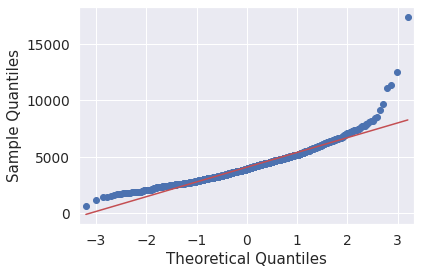

In [ ]:
qqplot(train_rem['totSqFt'], line='s')
pyplot.show()

In [ ]:
# checking outliers
# train_rem[train_rem['totSqFt']>10000]
# train_rem[train_rem['SalePrice']>700000]
# Seems that removing a house with totSqFt > 10000 is a good idea
train_rem.drop(train_rem[train_rem.totSqFt>10000].index, inplace = True)
# Same for SalePrice > 700000
train_rem.drop(train_rem[train_rem.SalePrice>700000].index, inplace = True)

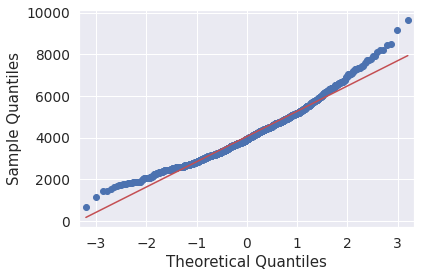

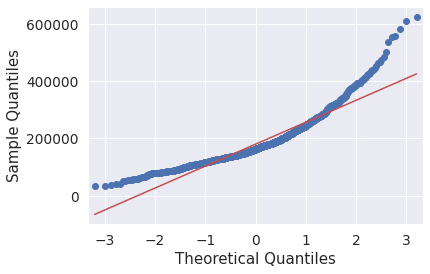

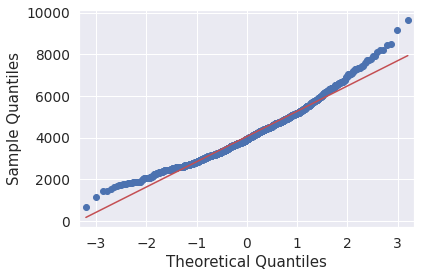

In [ ]:
# Rebuilding normality plots
qqplot(train_rem['SalePrice'], line='s')
qqplot(train_rem['totSqFt'], line='s')

(array([  5.,  10.,  34., 141., 401., 423., 260., 130.,  43.,   9.]),
 array([10.46024211, 10.74876859, 11.03729507, 11.32582155, 11.61434804,
        11.90287452, 12.191401  , 12.47992748, 12.76845396, 13.05698045,
        13.34550693]),
 <a list of 10 Patch objects>)

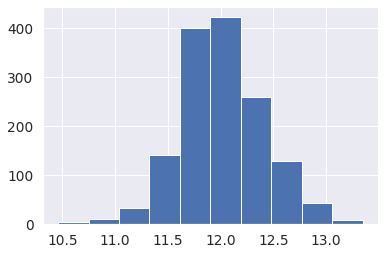

In [ ]:
# How SalePrice looks after log transformation
plt.hist(np.log(train_rem['SalePrice']))

**Cardinality**

None of the columns had lots of distinct categorical values in general, nor did the test and train sets exhibit high cardinality. Because of that, we were able to proceed with a plain vanilla one-hot encoding.

In [ ]:
# doing feature engineering on the test set

# turning object columns into category columns
for i in test.select_dtypes(include='object').columns.to_list():
    test[i] = train[i].astype('category')

test['Remodeled Y/N'] = np.where(test['YearRemodAdd'] ==test['YearBuilt'], 'No', 'Yes')
test['Age when Sold'] = test['YrSold'] - test['YearRemodAdd']

test['totSqFt'] = test['TotalBsmtSF'] + test['GrLivArea'] + test['1stFlrSF'] + test['2ndFlrSF']

test['totBath'] = test['FullBath'] + 0.5*test['HalfBath'] + test['BsmtFullBath'] + 0.5*test['BsmtHalfBath']

test['Remodeled Y/N']=test['Remodeled Y/N'].astype('category')

In [ ]:
cols_2_remove = ['GrLivArea','TotalBsmtSF','1stFlrSF','YearRemodAdd','YearBuilt','YrSold','Id','2ndFlrSF',
                'FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','BsmtFinSF2','3SsnPorch','GarageYrBlt']
test_rem = test.copy()
test_rem.drop(cols_2_remove, axis = 1, inplace = True)

In [ ]:
sp = train_rem['SalePrice']

In [ ]:
sp.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

**Encoding Categorical Variables using features**

In [ ]:
#Add new column Status to both sets to differentiate between the two
train_1 = train_rem.copy()
train_1.drop(labels = 'SalePrice', axis = 1, inplace = True)
train_1['Status'] = 'Train Set' # adding a column Status to differentiate between Train and Test in the combined set
test_1 = test_rem.copy()
test_1['Status'] = 'Test Set'
combo = train_1.copy()
combo = combo.append(test_1)

In [ ]:
train_1.shape
test_1.shape
combo.shape

(2905, 65)

In [ ]:
# extra checks
list(set(combo.columns.to_list()) ^ set(train_rem.columns.to_list()))

['SalePrice', 'Status']

In [ ]:
X = combo.copy()
St = X['Status']
X.drop('Status', axis = 1, inplace = True)

In [ ]:
combo['Status'].value_counts()
#St.value_counts()

Train Set    1456
Test Set     1449
Name: Status, dtype: int64

**Frequency Encoding**

Frequency encoding is not that hard to either understand or implement. We count the number of distinct values in a column and then divide by the total length of the column. As a result, we get a “share” of every value that will play well with any ML algorithm.

In [ ]:
X_cat = X.select_dtypes(include=['category'])
X_num = X.select_dtypes(exclude=['category'])

In [ ]:
X_encoded = pd.get_dummies(X_cat)

In [ ]:
print("X_encoded = {}\nX_num = {}\nSt = {}".format(X_encoded.shape,X_num.shape, St.shape))

X_encoded = (2905, 245)
X_num = (2905, 25)
St = (2905,)


In [ ]:
frames = [X_encoded, X_num, St]
combo_enc = pd.concat(frames, axis = 1)

In [ ]:
print('Combined set is {}'.format(combo_enc.shape))

Combined set is (2905, 271)


In [ ]:
train_enc = combo_enc.loc[combo_enc['Status']=='Train Set']
test_enc = combo_enc.loc[combo_enc['Status']=='Test Set']

In [ ]:
print('Encoded Train set is {}\nEncoded Test set is {}'.format(train_enc.shape,test_enc.shape))

Encoded Train set is (1456, 271)
Encoded Test set is (1449, 271)


In [ ]:
# doing np.log on SalePrice -- done above
sp = np.log(sp)
# adding SalePrice to Encoded Train set
fr = [train_enc, sp]
train_enc = pd.concat(fr, axis = 1)

In [ ]:
print('New shape of train_enc is {}'.format(train_enc.shape))

New shape of train_enc is (1456, 272)


**Frequency encoding. Added later**

In [ ]:
X_cat_freq = X_cat.copy()

In [ ]:
#X_cat_freq.shape
# X_num.shape
# St.shape

In [ ]:
for c in X_cat_freq.columns.to_list():
    X_cat_freq[c] = X_cat_freq.groupby(c).transform('count')/len(X_cat_freq[c])

In [ ]:
frames_freq = [X_cat_freq, X_num, St]
combo_enc_freq = pd.concat(frames_freq, axis = 1)

In [ ]:
combo_enc_freq.shape
# All features and Status are together

(2905, 65)

In [ ]:
#cut combo_enc_freq by Train and Test. Add SalePrice back to the Train portion
train_freq = combo_enc_freq.loc[combo_enc_freq['Status']=='Train Set']
test_freq = combo_enc_freq.loc[combo_enc_freq['Status']=='Test Set']

# adding SalePrice to Encoded Train set
fr = [train_freq, sp]
train_freq = pd.concat(fr, axis = 1)

In [ ]:
# Checking sizes 
print("Respective sizes of the train set: {}\nOf the test set: {}\nOf the prices array:{}".format(train_freq.shape, test_freq.shape, sp.shape))

Respective sizes of the train set: (1456, 66)
Of the test set: (1449, 65)
Of the prices array:(1456,)


In [ ]:
from sklearn.model_selection import train_test_split
features_freq = train_freq.drop(['SalePrice','Status'], axis = 1)
result_freq = np.exp(train_freq['SalePrice'])

X_train_freq, X_test_freq, y_train_freq, y_test_freq = train_test_split(features_freq, result_freq, test_size = 0.2, random_state = 12)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


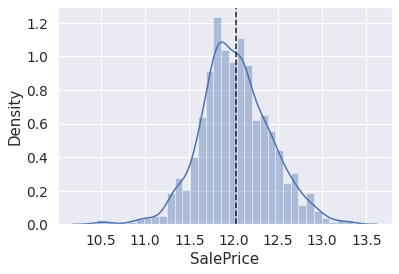

In [ ]:
sns.distplot(train_enc['SalePrice'])
plt.axvline(train_enc['SalePrice'].mean(), color="k", linestyle="--")

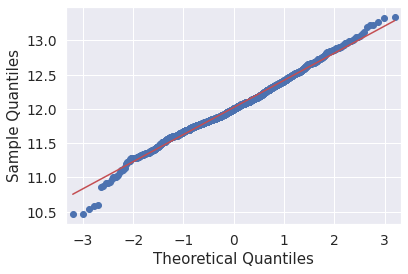

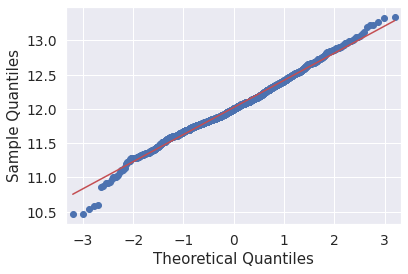

In [ ]:
qqplot(train_enc['SalePrice'], line='s')

In [ ]:
features = train_enc.drop(['SalePrice','Status'], axis = 1)
result = train_enc['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, result, test_size = 0.2, random_state = 12)

**Machine Learning Part**

Base case with a regression 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lg = LinearRegression()
lg.fit(X_train, y_train)
prediction_1 = lg.predict(X_test)

In [ ]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [111]:
r2_score(y_test, prediction_1)
mean_squared_error(y_test, prediction_1)
# in absolute numbers
#print("Mean error in $ is {:.2}".
#      format(np.sqrt(mean_squared_error(np.exp(y_test), np.exp(prediction_1)))))

2.992018197428444e+25

**Regression and lasso**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


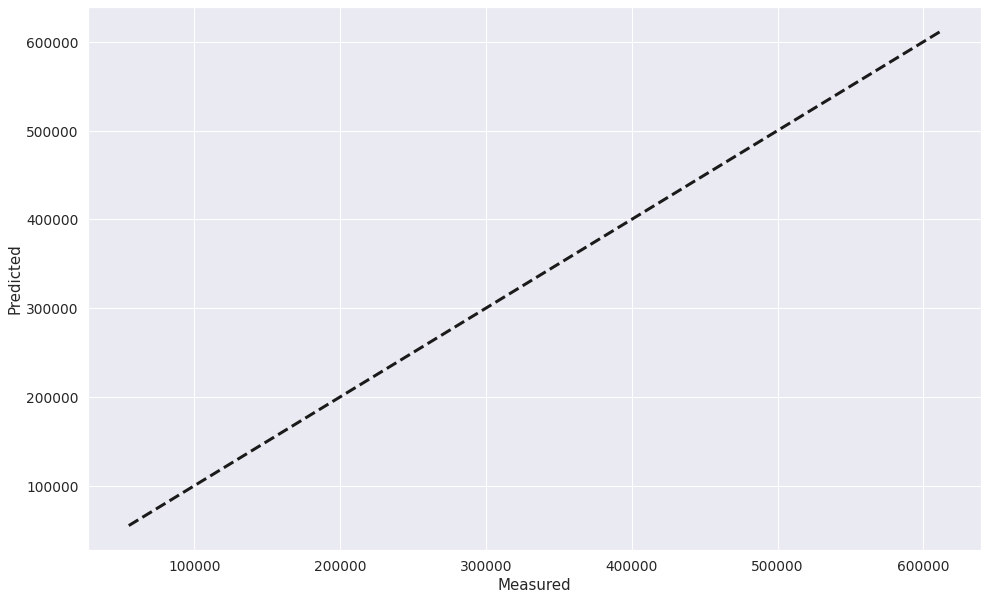

In [112]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(np.exp(y_test), np.exp(prediction_1))
ax.plot([np.exp(y_test.min()), np.exp(y_test.max())], [np.exp(y_test.min()), np.exp(y_test.max())], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [113]:
print("For the test set, the mean squared error is {}, and R2 is {:.2%}".format(np.sqrt(mean_squared_error(y_test, prediction_1)),r2_score(y_test, prediction_1)))

For the test set, the mean squared error is 5469934366542.659, and R2 is -19375418106240685204691746816.00%


In [114]:
from sklearn.linear_model import Lasso

In [116]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [118]:
pred_train_lasso= model_lasso.predict(X_train)
pred_test_lasso= model_lasso.predict(X_test)
print("After lasso, for the test set, the mean squared error is {:2}, and R2 is {:.2%}".format(np.sqrt(mean_squared_error(y_test,pred_test_lasso)), r2_score(y_test, pred_test_lasso)))
print("After lasso, for the train set, the mean squared error is {:2}, and R2 is {:.2%}".format(np.sqrt(mean_squared_error(y_train,pred_train_lasso)), r2_score(y_train, pred_train_lasso)))

After lasso, for the test set, the mean squared error is 757.9551906051954, and R2 is -372026433.29%
After lasso, for the train set, the mean squared error is 0.11272637221338193, and R2 is 91.89%


In [119]:
# GridSearch for lasso parameters
# Should be done on the whole dataset before the train and test split
from sklearn.model_selection import GridSearchCV

In [120]:
alp = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
max_i = [1000, 1500, 2000, 2500]
param_grid = dict(alpha = alp, max_iter = max_i)
gsc = GridSearchCV(
    estimator = Lasso(),
    param_grid = param_grid)
result_gsc = gsc.fit(features, result)

print("Best score: %f using %s" % (result_gsc.best_score_, result_gsc.best_params_))
means = result_gsc.cv_results_['mean_test_score']
stds = result_gsc.cv_results_['std_test_score']
params = result_gsc.cv_results_['params']

Best score: 0.871851 using {'alpha': 0.01, 'max_iter': 1000}


In [121]:
from sklearn.model_selection import cross_validate

In [122]:
sc = cross_validate(lg, X_train, y_train, scoring='r2', cv=3, return_train_score = True)   
print("R2 Scores are {}\nIts mean is {}".format(sc['test_score'],sc['test_score'].mean()))

R2 Scores are [-3.14910772e+25 -8.95064894e+25 -1.16658160e+25]
Its mean is -4.422112754124283e+25


In [123]:
sc = cross_validate(lg, X_train, y_train, scoring='explained_variance', cv=3, return_train_score = True)   
print(sc['test_score'].mean())

-4.392142518196364e+25


In [124]:
sc = cross_validate(lg, X_train, y_train, scoring='max_error', cv=3, return_train_score = True)   
print(sc['test_score'].mean())

-29343720248560.266


**Linear Regression and XGBoost with the dataset encoded using Frequency Encoding**

In [125]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
import math

In [126]:
regr_freq = LinearRegression()

In [127]:
regr_freq.fit(X_train_freq, y_train_freq)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
print("RMSE is: {:.2f}\nR_squared is {:.2f}%".format(math.sqrt(np.mean((regr_freq.predict(X_test_freq) - y_test_freq) ** 2)),regr_freq.score(X_test_freq,y_test_freq)*100))

RMSE is: 27067.56
R_squared is 88.96%


In [129]:
xgb_freq = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)

In [130]:
xgb_freq.fit(X_train_freq,y_train_freq)
predictions_xgb_freq = xgb_freq.predict(X_test_freq)
print("The explained variance is {:.2f}".format(explained_variance_score(predictions_xgb_freq,y_test_freq)))

[23:27:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The explained variance is 0.89


**Grid for XGBoost**

In [131]:
# TAKES TIME
n_estimators = [80, 100, 120, 140, 160]
max_depth = [4, 5, 6, 7, 8, 9, 10]
learning_rate = [0.0001, 0.001, 0.005, 0.01, 0.1, 0.2, 0.3, 0.04]
param_grid = dict(max_depth = max_depth, n_estimators = n_estimators, learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 10)
grid_search_xg_freq = GridSearchCV(xgb_freq, param_grid, scoring = 'r2', n_jobs = -1, cv=kfold, verbose = 1)
result_gcv_xgb_freq = grid_search_xg_freq.fit(X_train_freq, y_train_freq.astype(int))

Fitting 10 folds for each of 280 candidates, totalling 2800 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 2800 out of 2800 | elapsed: 22.2min finished


[23:51:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [132]:
print("Best score: %f using %s" % (result_gcv_xgb_freq.best_score_, result_gcv_xgb_freq.best_params_))
means = result_gcv_xgb_freq.cv_results_['mean_test_score']
stds = result_gcv_xgb_freq.cv_results_['std_test_score']
params = result_gcv_xgb_freq.cv_results_['params']

Best score: 0.903727 using {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 160}


In [133]:
# Rebuilding using the best parameters:
xgb_freq = xgb.XGBRegressor(n_estimators=110, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=5)

xgb_freq.fit(X_train_freq,y_train_freq)
predictions_xgb_freq = xgb_freq.predict(X_test_freq)
print("R squared is {}".format(explained_variance_score(predictions_xgb_freq,y_test_freq)))

[00:49:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R squared is 0.8957656803810611


**Lasso Regression**

In [134]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train_freq, y_train_freq)

pred_train_lasso_freq= model_lasso.predict(X_train_freq)
pred_test_lasso_freq= model_lasso.predict(X_test_freq)
print("After lasso, for the test set, the mean squared error is {:2}, and R2 is {:.2%}".format(
     np.sqrt(mean_squared_error(y_test_freq,pred_test_lasso_freq)), r2_score(y_test_freq, pred_test_lasso_freq)))
print("After lasso, for the train set, the mean squared error is {:2}, and R2 is {:.2%}".format(
     np.sqrt(mean_squared_error(y_train_freq,pred_train_lasso_freq)), r2_score(y_train_freq, pred_train_lasso_freq)))

After lasso, for the test set, the mean squared error is 27067.55021660099, and R2 is 88.96%
After lasso, for the train set, the mean squared error is 23263.860457219333, and R2 is 90.45%


[Handling cat] (https://https://github.com/nastyh/Feature-Engineering--House-Prices/blob/master/Features_for_MLOps.ipynb)